In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns



## **DOMAIN: Automobile**

**CONTEXT:**
The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5
continuous attributes.

# **DATA DESCRIPTION:**

**cylinders:** multi-valued discrete

**acceleration:** continuous

**displacement:** continuous

**model year:** multi-valued discrete

**horsepower:** continuous

**origin:** multi-valued discrete

**weight:** continuous

**car name:** string (unique for each instance)

**mpg:** continuous

# **PROJECT OBJECTIVE:**
To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

**Data Understanding & Exploration:**

In [4]:
#Read the ‘Car name.csv’ file
cn = pd.read_csv("/content/drive/MyDrive/AIML/AIML/Unsupervised Learning/UL Project/Car name.csv")
print(cn)

                      car_name
0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
..                         ...
393            ford mustang gl
394                  vw pickup
395              dodge rampage
396                ford ranger
397                 chevy s-10

[398 rows x 1 columns]


In [5]:
#Read the Car-Attributes.json file

ca = pd.read_json('/content/drive/MyDrive/AIML/AIML/Unsupervised Learning/UL Project/Car-Attributes.json')
print(ca)

      mpg  cyl   disp   hp    wt   acc  yr  origin
0    18.0    8  307.0  130  3504  12.0  70       1
1    15.0    8  350.0  165  3693  11.5  70       1
2    18.0    8  318.0  150  3436  11.0  70       1
3    16.0    8  304.0  150  3433  12.0  70       1
4    17.0    8  302.0  140  3449  10.5  70       1
..    ...  ...    ...  ...   ...   ...  ..     ...
393  27.0    4  140.0   86  2790  15.6  82       1
394  44.0    4   97.0   52  2130  24.6  82       2
395  32.0    4  135.0   84  2295  11.6  82       1
396  28.0    4  120.0   79  2625  18.6  82       1
397  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 8 columns]


In [6]:
#merge the two dataframes using the index from both the files
df_car = pd.merge(cn,ca,left_index=True, right_index=True)
df =df_car.copy()
print("The Merged DataFrame")
print("")
print(df)

The Merged DataFrame

                      car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0    chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1            buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2           plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3                amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                  ford torino  17.0    8  302.0  140  3449  10.5  70       1
..                         ...   ...  ...    ...  ...   ...   ...  ..     ...
393            ford mustang gl  27.0    4  140.0   86  2790  15.6  82       1
394                  vw pickup  44.0    4   97.0   52  2130  24.6  82       2
395              dodge rampage  32.0    4  135.0   84  2295  11.6  82       1
396                ford ranger  28.0    4  120.0   79  2625  18.6  82       1
397                 chevy s-10  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 9 columns]


In [7]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
#Print 5 point summary of the numerical features
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000




*   The Data Frame has 398 rows
*   **mpg -** MPG shows a broad range and higher max value → dataset includes both low- and high-efficiency cars.
*   **Cyl -** Cylinders vary mostly between 4 and 8, with 4 being most common (median = 4)
*   **disp -** The disp ranges from 68 to 455, the std is 104.26 which shows the values are spread across the mean values and suggesting a mix of small and large engines
*   **Wt -** The Wt ranges from 1613 to 5140, the std 846 is high which shows the values are distributed around the mean values and there is combination of lightweight and heavy vehicles
*   **acc -** The acceleration ranges from 8 to 24
*   **yr -** The year of manufacturing varies from years 70 to 82
*   **origin -** The orgin values ranges form 1 to 3


**Data Preparation & Analysis:**

In [9]:
# Print feature-wise percentage of null values
for col in df.columns:

    pct_null = df[col].isnull().sum() * 100 / len(df)
    print(f"{col}: {pct_null:.2f}%")

car_name: 0.00%
mpg: 0.00%
cyl: 0.00%
disp: 0.00%
hp: 0.00%
wt: 0.00%
acc: 0.00%
yr: 0.00%
origin: 0.00%


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


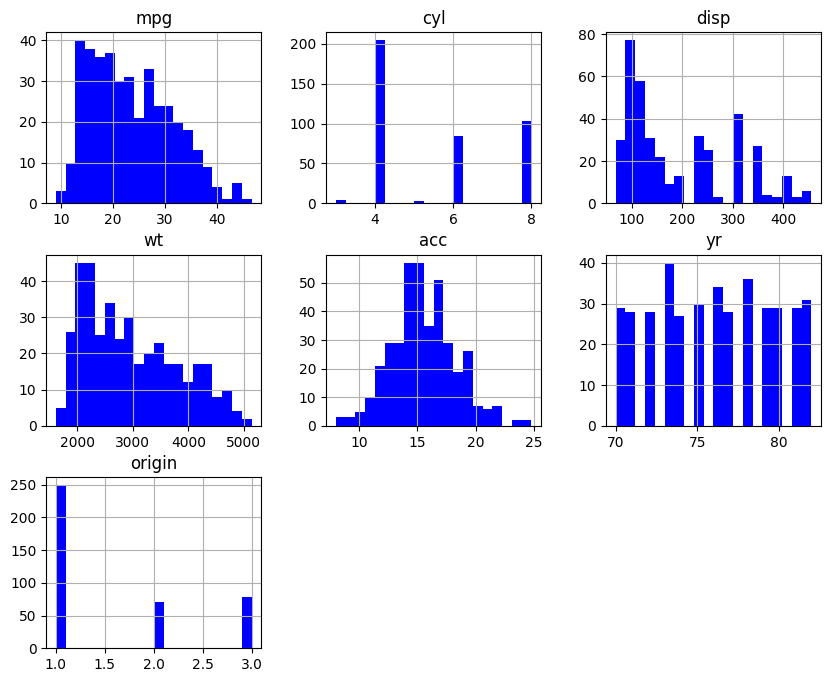

In [11]:
#plot histograms
df.hist(bins = 20, figsize = (10, 8), color = 'blue')
plt.show()

In [12]:
df['car_name'].value_counts()

,count
car_name,
ford pinto,6
ford maverick,5
amc matador,5
toyota corolla,5
amc hornet,4
...,...
amc concord dl,1
volkswagen rabbit l,1
mazda glc custom l,1


In [13]:
df['origin'].value_counts()

,count
origin,
1,249
3,79
2,70


In [14]:
df['cyl'].value_counts()

,count
cyl,
4,204
8,103
6,84
3,4
5,3


**Check for duplicate values in the data and imputing with the best suitable approach.**

In [15]:
duplicates = df.duplicated()
# Check if there are any duplicates (using `any` method)
if duplicates.any():
    print("Number of duplicate rows:", duplicates.sum())
else:
    print("There are no duplicate rows in the DataFrame")

There are no duplicate rows in the DataFrame


**Plot a pairplot for all features.**

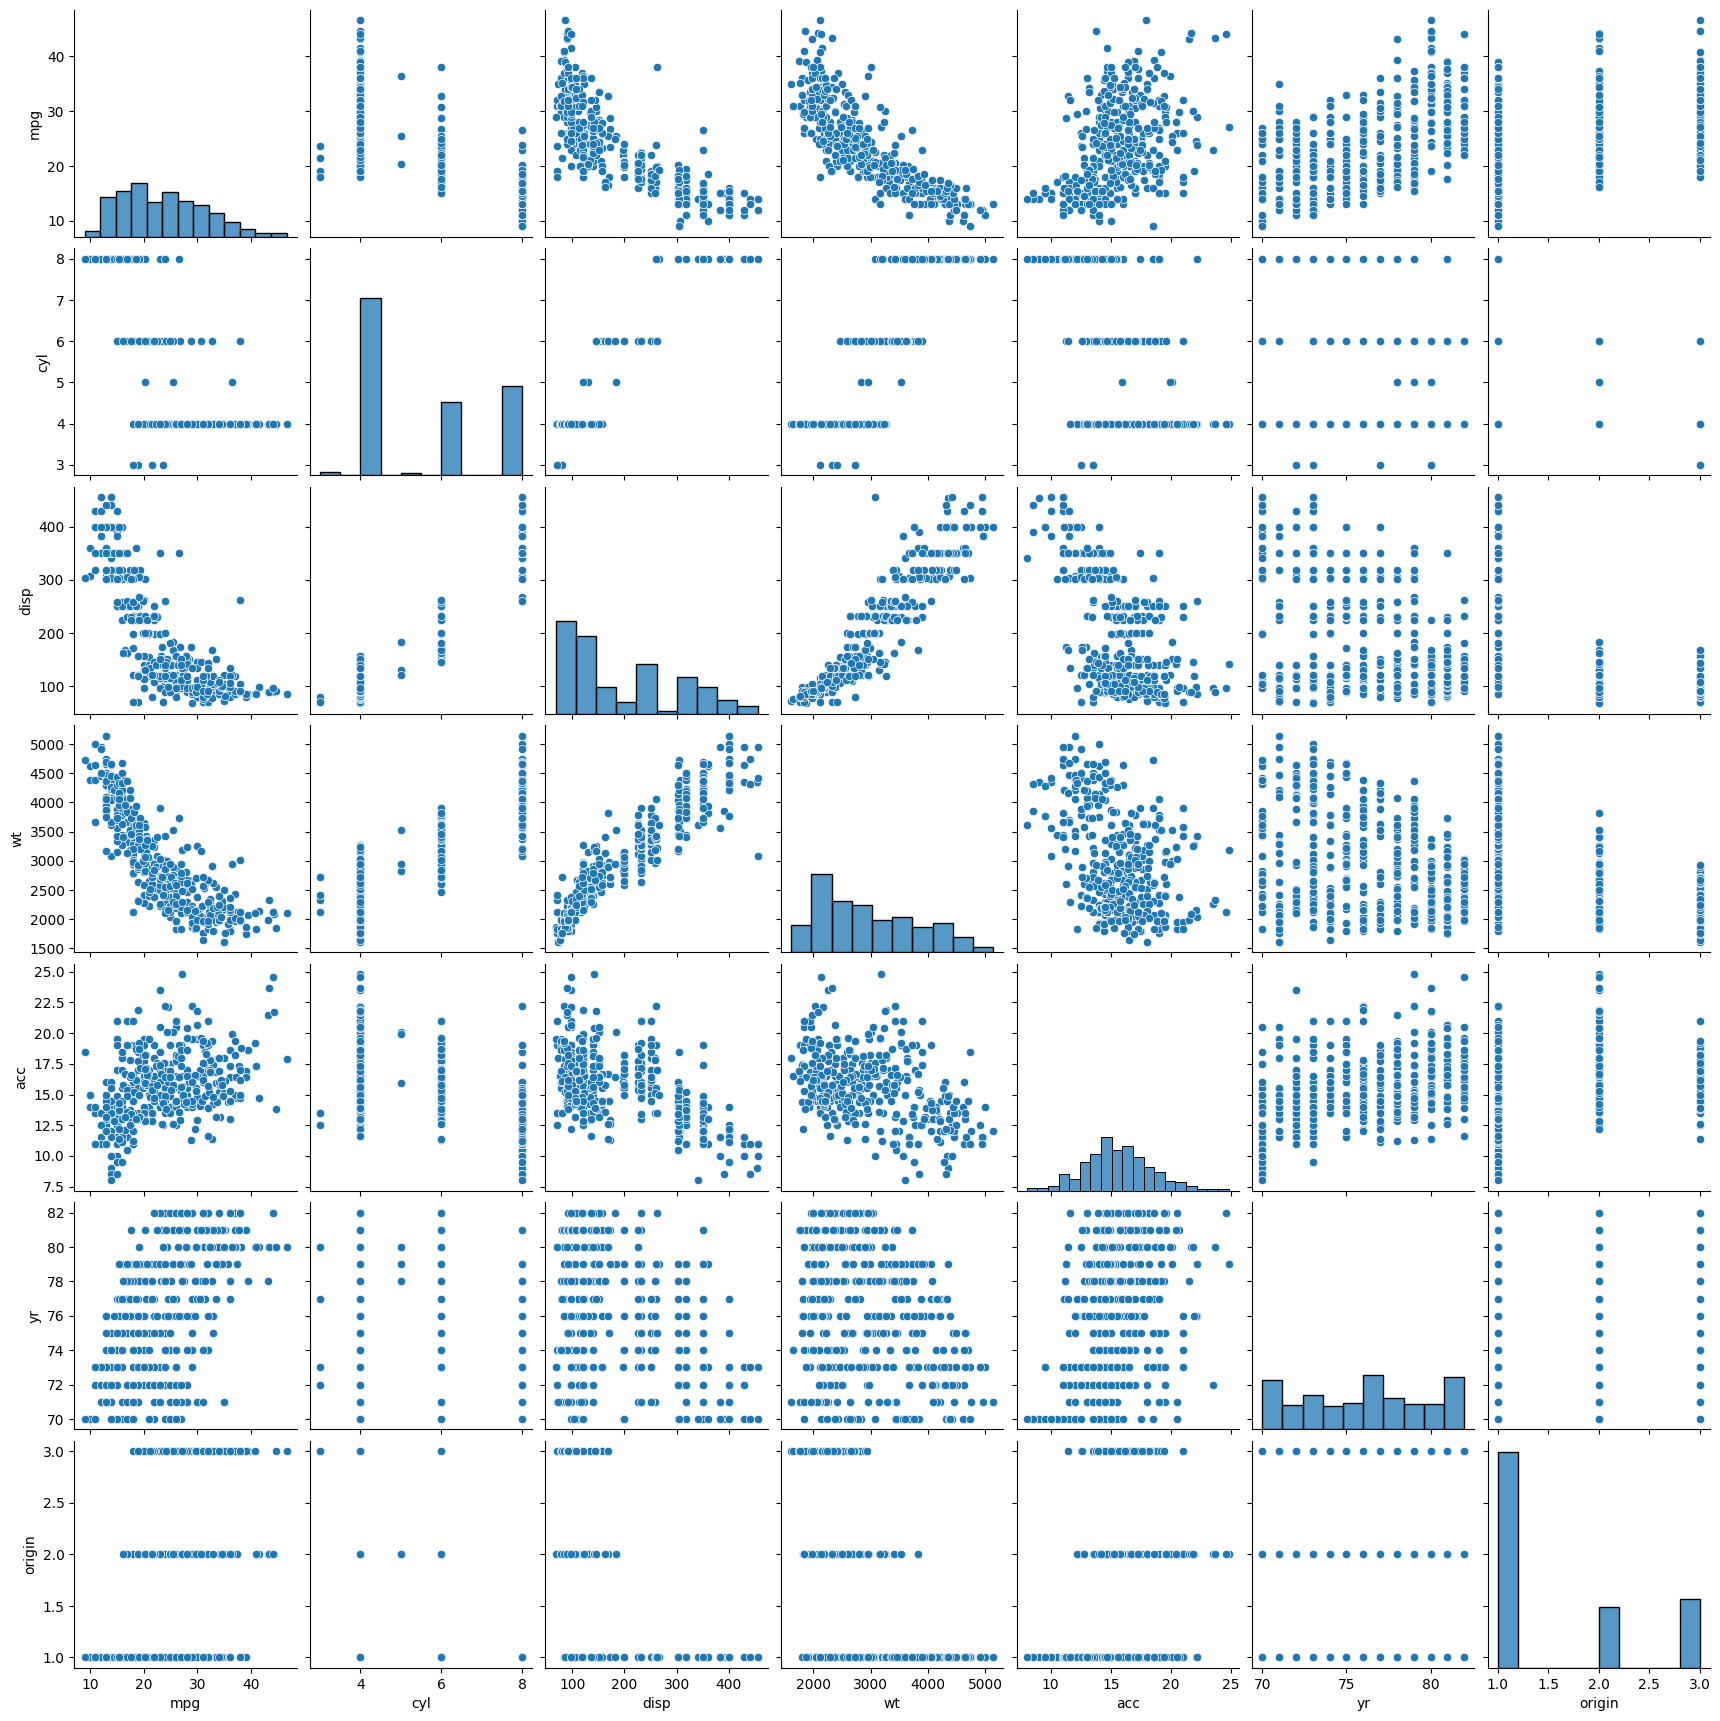

In [16]:
# Create a pairplot for all features
sns.pairplot(data=df)
plt.show()

**Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.**

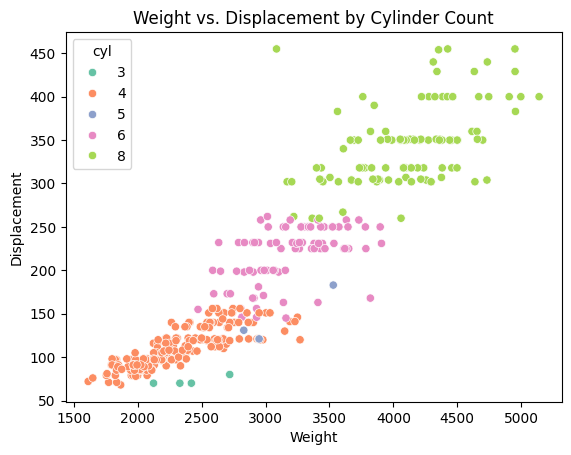

In [17]:
# Create the scatterplot
sns.scatterplot(x='wt',y='disp', hue='cyl', data=df, palette='Set2')

# Add labels and title (optional)
plt.ylabel('Displacement')
plt.xlabel('Weight')
plt.title('Weight vs. Displacement by Cylinder Count')

# Show the plot
plt.show()

**Positive Correlation**

- As weight increases, displacement also tends to increase — heavier cars

typically have larger engines.

**3 & 4 cylinders:**

- Found mostly in lighter vehicles with lower displacement.

- Clusters in the bottom-left region.

**6 cylinders:**

- Occupy the mid-range of both weight and displacement.

**8 cylinders:**

- Concentrated in the top-right.

- Heaviest cars with the largest engine sizes.

**Distinct Clusters**

- Each cylinder count shows a relatively distinct cluster, suggesting a strong relationship between cylinder count, weight, and displacement.

**Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.**

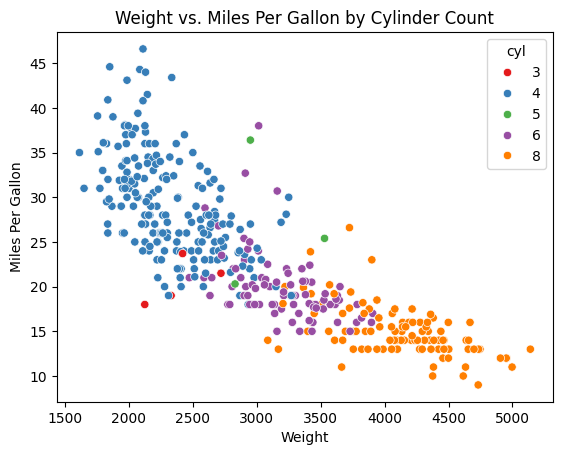

In [18]:
# Create the scatterplot
sns.scatterplot(x='wt', y='mpg', hue='cyl', data=df, palette='Set1')

# Add labels and title (optional)
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')
plt.title('Weight vs. Miles Per Gallon by Cylinder Count')

# Show the plot
plt.show()

**Strong Negative Correlation**

- As weight increases, MPG decreases.

- Heavier cars are less fuel-efficient, which is expected due to greater energy demand.

**Cylinders & Efficiency**

**4-cylinder cars:**

- High MPG (up to ~45).

- Typically lighter in weight (under 3000 lbs).

- Best fuel economy overall.

**6-cylinder cars:**

- Middle range in weight and MPG.

**8-cylinder cars:**

- Heaviest and least fuel-efficient.

- Clustered below 20 MPG.

**3- and 5-cylinder cars:**

- Very few samples.

- Appear as outliers.

**Tight Clusters by Cylinder Count**

- Each group forms a distinct "band" in the plot, reinforcing that cylinder count is a strong indicator of both vehicle weight and MPG.

In [19]:
#Check for unexpected values
df['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

- "?" a non numeric value is found which has to be cleaned

In [20]:
# Replace missing values with NaN
df = df.replace('?', np.nan)


<ipython-input-20-2485768481>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('?', np.nan)


In [21]:
# Drop rows with any null values
df.dropna(inplace=True)
df['hp'].unique()
df1 = df

In [22]:
#check for any unexpected values after replacement
df['hp'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [23]:
#Check for unexpected values
df['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 33.8, 32.7, 23.7, 32.4, 26.6, 25.8, 23.5, 39.1,
       39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9, 31.6, 28.1,
       30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [24]:
#Check for unexpected values
df['cyl'].unique()

array([8, 4, 6, 3, 5])

In [25]:
#Check for unexpected values
df['disp'].unique()

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 113. , 198. , 199. , 200. ,  97. ,
       110. , 107. , 104. , 121. , 360. , 140. , 232. , 225. , 250. ,
       351. , 258. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,  91. ,
        97.5,  70. , 120. ,  96. ,  98. , 108. , 155. ,  68. , 114. ,
       156. ,  76. ,  83. ,  90. , 231. , 262. , 134. , 119. , 171. ,
       115. , 101. , 305. ,  85. , 130. , 168. , 111. , 260. , 151. ,
       146. ,  80. ,  78. , 105. , 131. , 163. ,  89. , 267. ,  86. ,
       183. , 141. , 173. , 135. ,  81. , 145. , 112. , 181. , 144. ])

In [26]:
#Check for unexpected values
df['wt'].unique()

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2264, 2228, 2634, 3439,
       3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746, 5140, 2962,
       2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613, 1834, 1955,
       2278, 2126, 2254, 2226, 4274, 4385, 4135, 4129, 3672, 4633, 4502,
       4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933, 2511, 2979, 2189,
       2395, 2288, 2506, 2164, 2100, 4100, 3988, 4042, 3777, 4952, 4363,
       4237, 4735, 4951, 3821, 3121, 3278, 2945, 3021, 2904, 1950, 4997,
       4906, 4654, 4499, 2789, 2279, 2401, 2379, 2124, 2310, 2472, 2265,
       4082, 4278, 1867, 2158, 2582, 2868, 3399, 2660, 2807, 3664, 3102,
       2901, 3336, 2451, 1836, 2542, 3781, 3632, 3613, 4141, 4699, 4457,
       4638, 4257, 2219, 1963, 2300, 1649, 2003, 2125, 2108, 2246, 2489,
       2391, 2000, 3264, 3459, 3432, 3158, 4668, 44

In [27]:
#Check for unexpected values
df['acc'].unique()

array([12. , 11.5, 11. , 10.5, 10. ,  9. ,  8.5,  8. ,  9.5, 15. , 15.5,
       16. , 14.5, 20.5, 17.5, 12.5, 14. , 13.5, 18.5, 13. , 19. , 19.5,
       18. , 17. , 23.5, 16.5, 21. , 16.9, 14.9, 17.7, 15.3, 13.9, 12.8,
       15.4, 17.6, 22.2, 22.1, 14.2, 17.4, 16.2, 17.8, 12.2, 16.4, 13.6,
       15.7, 13.2, 21.9, 16.7, 12.1, 14.8, 18.6, 16.8, 13.7, 11.1, 11.4,
       18.2, 15.8, 15.9, 14.1, 21.5, 14.4, 19.4, 19.2, 17.2, 18.7, 15.1,
       13.4, 11.2, 14.7, 16.6, 17.3, 15.2, 14.3, 20.1, 24.8, 11.3, 12.9,
       18.8, 18.1, 17.9, 21.7, 23.7, 19.9, 21.8, 13.8, 12.6, 16.1, 20.7,
       18.3, 20.4, 19.6, 17.1, 15.6, 24.6, 11.6])

In [28]:
#Check for unexpected values
df['yr'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [30]:
df_car = df.copy()

**Clustering:**

**Apply K-Means clustering for 2 to 10 clusters.**

In [31]:
#scaling the data
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

# Creating an object for the StandardScaler function
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df.iloc[:,1:])

In [32]:
#print the scaled data
scaled_df

array([[-0.69863841,  1.48394702,  1.07728956, ..., -1.285258  ,
        -1.62531533, -0.71664105],
       [-1.08349824,  1.48394702,  1.48873169, ..., -1.46672362,
        -1.62531533, -0.71664105],
       [-0.69863841,  1.48394702,  1.1825422 , ..., -1.64818924,
        -1.62531533, -0.71664105],
       ...,
       [ 1.09737414, -0.86401356, -0.56847897, ..., -1.4304305 ,
         1.63640964, -0.71664105],
       [ 0.5842277 , -0.86401356, -0.7120053 , ...,  1.11008813,
         1.63640964, -0.71664105],
       [ 0.96908753, -0.86401356, -0.72157372, ...,  1.40043312,
         1.63640964, -0.71664105]])

In [33]:
#Kmeans Model building
#import the library
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist

n_init = 10
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k,random_state=0, n_init=n_init)
    model.fit(scaled_df)
    prediction=model.predict(scaled_df)
    meanDistortions.append(sum(np.min(cdist(scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])

print(clusters)
print(meanDistortions)


range(2, 11)
[np.float64(1.9091840803351565), np.float64(1.628758749472895), np.float64(1.4766795914400073), np.float64(1.3336142756495504), np.float64(1.2777271755037078), np.float64(1.217194324470602), np.float64(1.1836238725202222), np.float64(1.1398238686764108), np.float64(1.1044703706061147)]


**Plot a visual and find elbow point.**

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

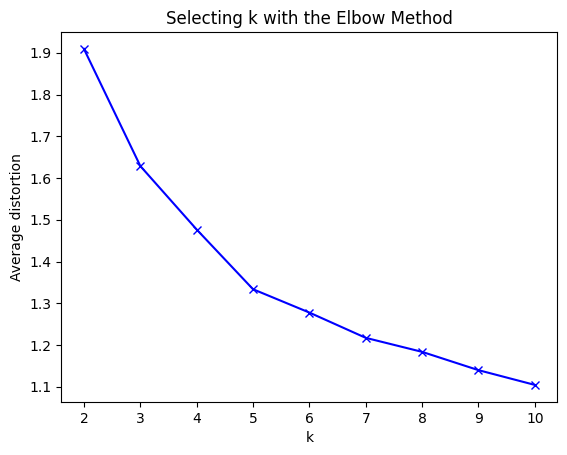

In [34]:
#plotting the k values
plt.plot(clusters, meanDistortions, 'bx-',)
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Text(0.5, 1.0, 'Possible Elbow Points')

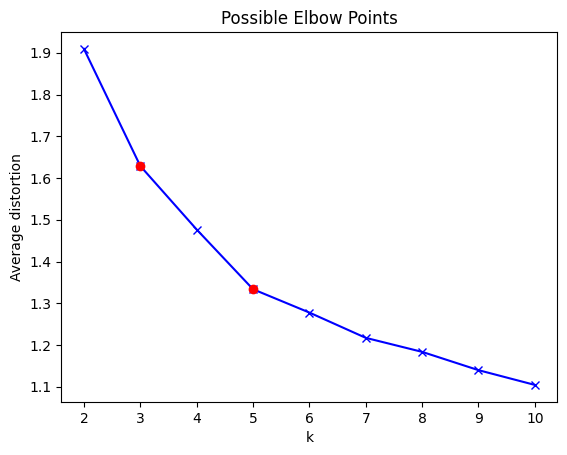

In [35]:
plt.plot(clusters, meanDistortions,'bx-');
plt.plot(3,1.628758749472895,'ro')
plt.plot(5,1.3336142756495504,'ro')

plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Possible Elbow Points')

**Train a K-means clustering model once again on the optimal number of clusters.**

In [36]:
# Let us assign with K = 5
n_init = 10
final_model=KMeans(5,n_init = n_init)
final_model.fit(scaled_df)
prediction = final_model.predict(scaled_df)


**Add a new feature in the DataFrame which will have labels based upon cluster value.**

In [37]:
#Append the prediction
df["Clusters"] = prediction

print("Clusters Assigned : \n")
df.head()


Clusters Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Clusters
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,3
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,3
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,3
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,3
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,3


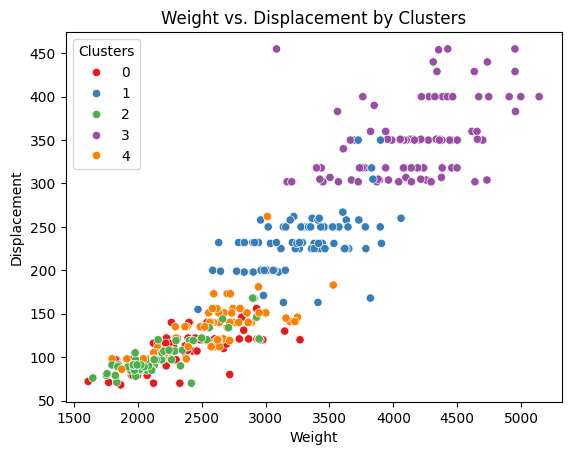

In [38]:
# Create the scatterplot
sns.scatterplot(x='wt',y='disp', hue='Clusters', data=df, palette='Set1')

# Add labels and title (optional)
plt.ylabel('Displacement')
plt.xlabel('Weight')
plt.title('Weight vs. Displacement by Clusters')

# Show the plot
plt.show()

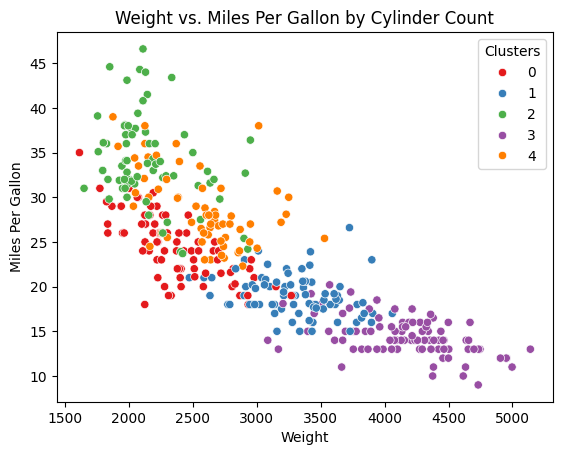

In [39]:
# Create the scatterplot for Weight vs. Miles Per Gallon by by Clusters
sns.scatterplot(x='wt', y='mpg', hue='Clusters', data=df, palette='Set1')

# Add labels and title (optional)
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')
plt.title('Weight vs. Miles Per Gallon by Cylinder Count')

# Show the plot
plt.show()

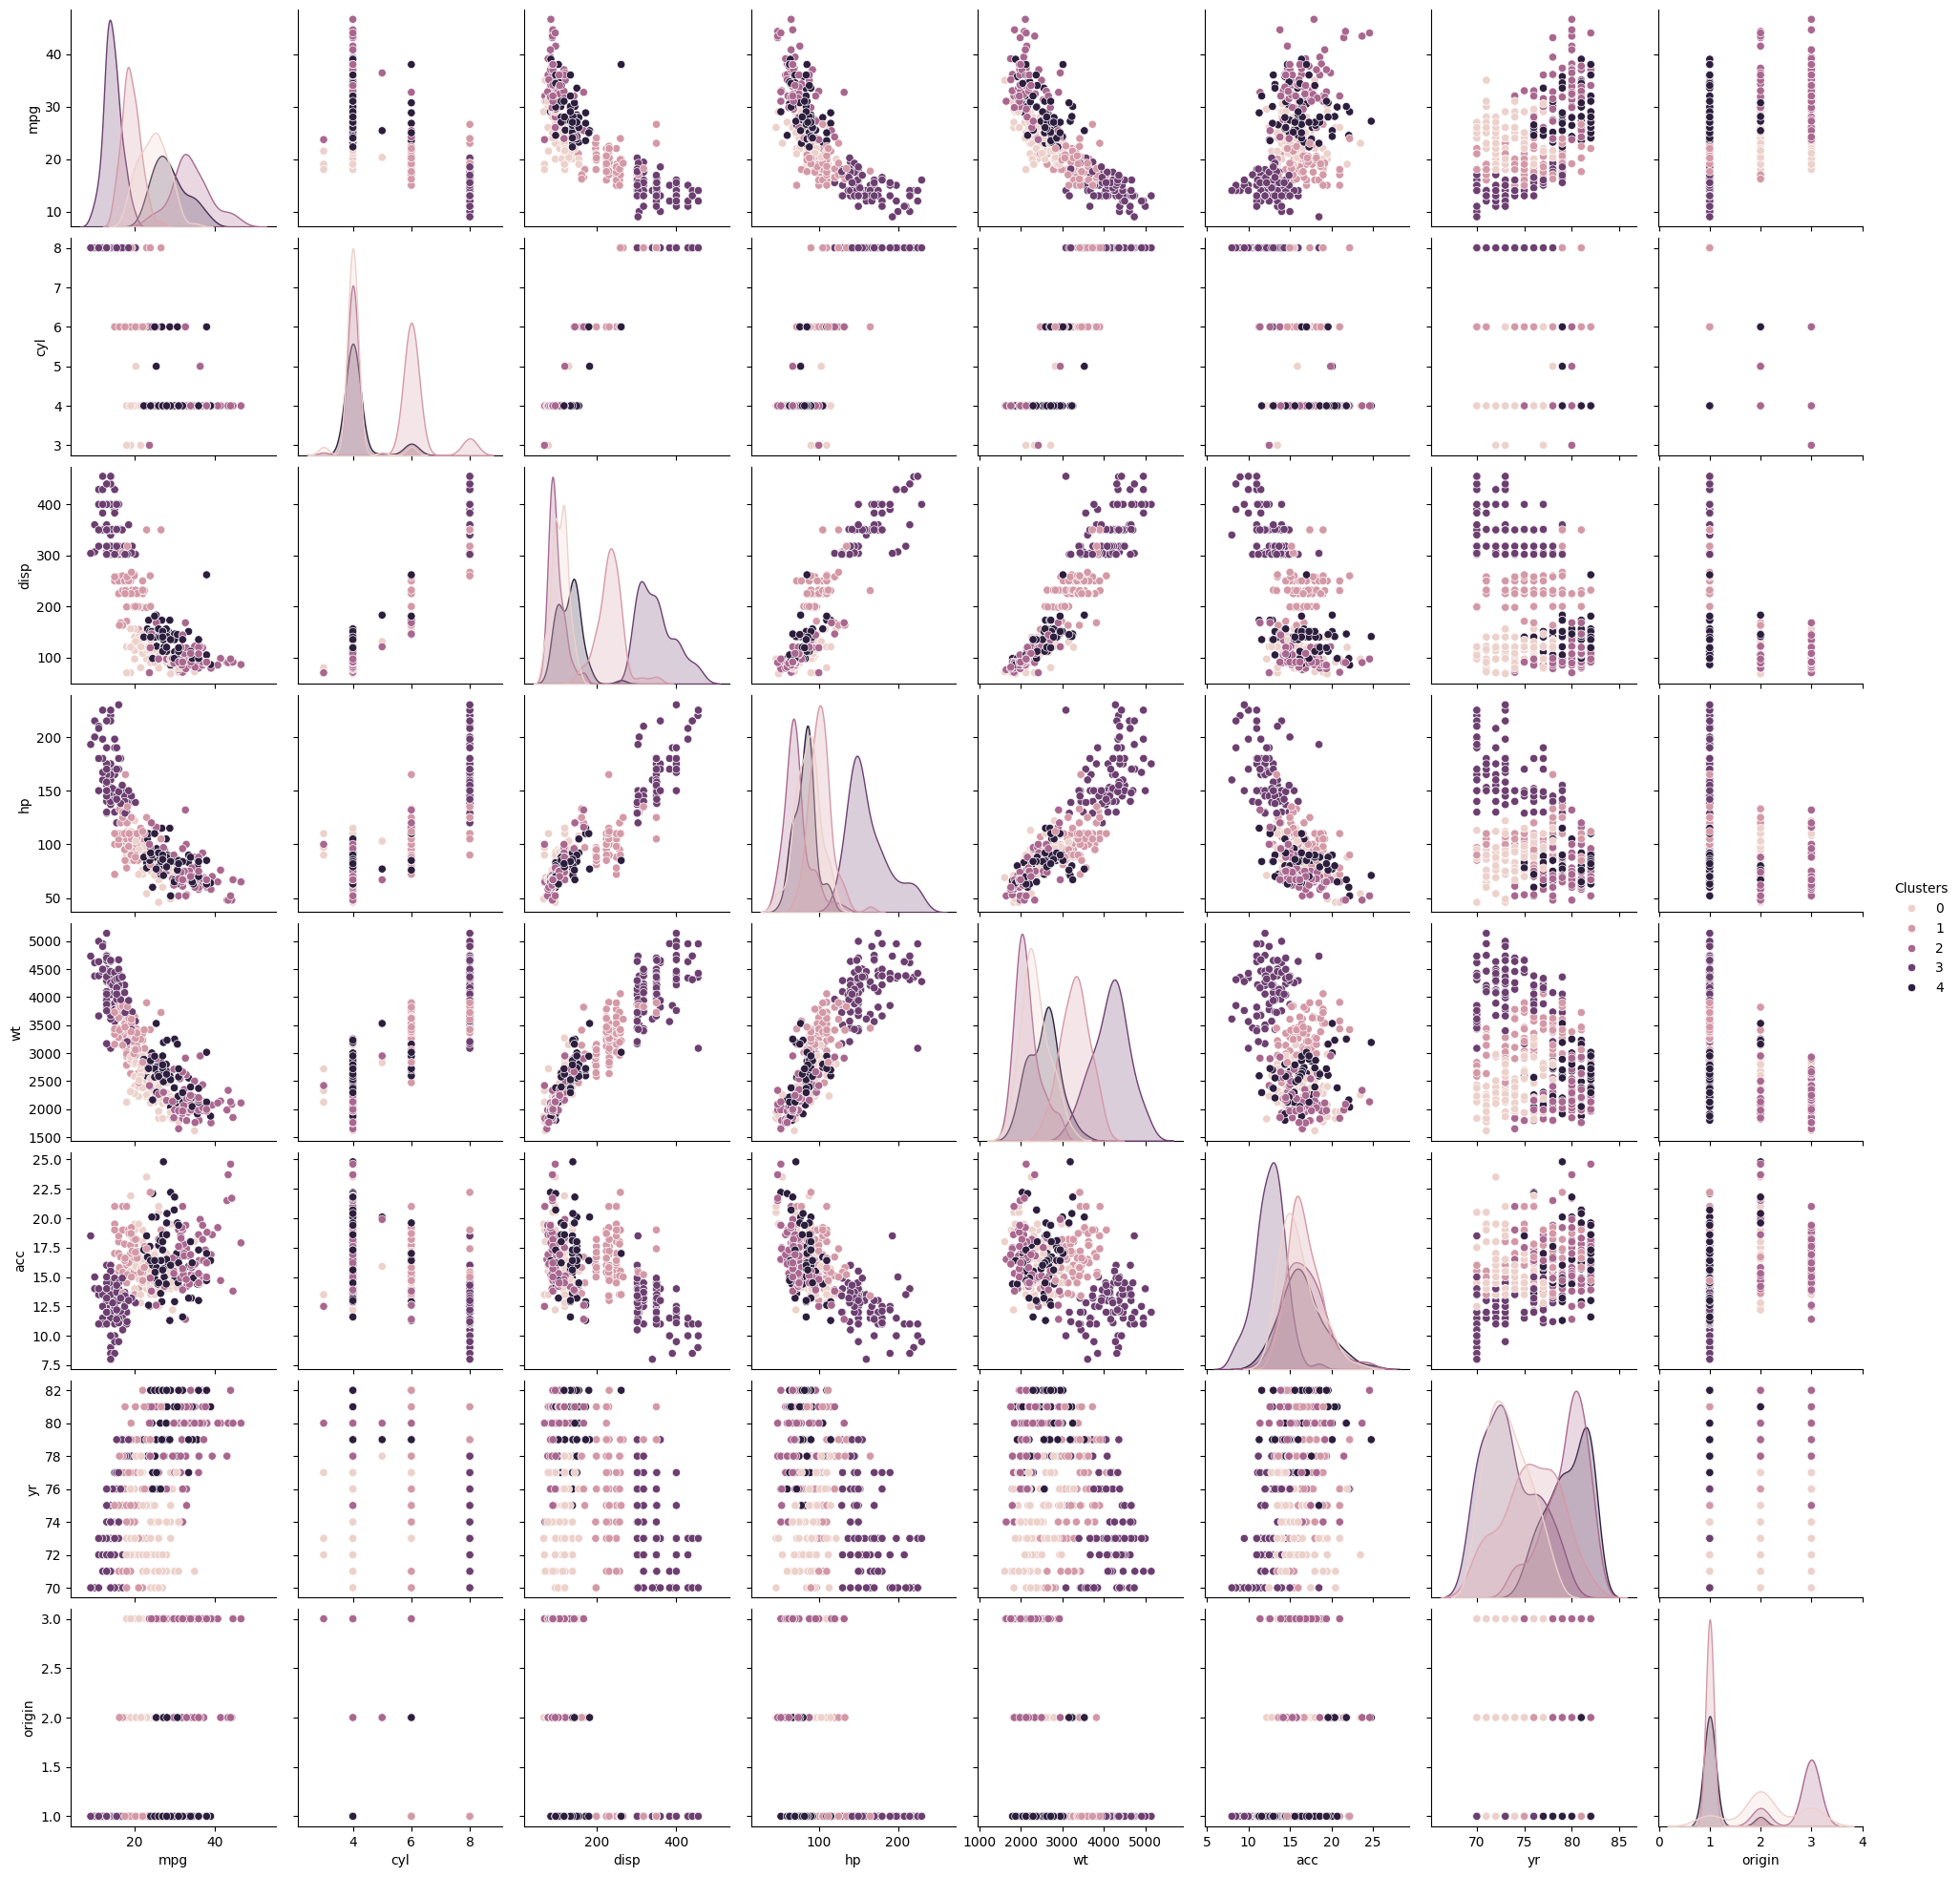

In [40]:
sns.pairplot(df, hue="Clusters")
plt.show()

In [41]:
df1

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Clusters
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,3
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,3
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,3
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,3
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,3
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1,4
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,4
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1,4


In [42]:
# Create a new row as a dictionary
new_row = {'car_name': 'ford torino_new', 'mpg': 16.0,'cyl': 8,'mpg': 35,'disp': 305,'hp': 135,'wt': 3505,'acc': 11,'yr': 71,'origin':2}

new_row_df = pd.DataFrame(new_row, index=[0])  # Create a single-row DataFrame

# Append the new row to the DataFrame df2 using concat
df1 = pd.concat([df_car, new_row_df], ignore_index=True)

print(df1)

                      car_name   mpg  cyl   disp     hp    wt   acc  yr  \
0    chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70   
1            buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70   
2           plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70   
3                amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70   
4                  ford torino  17.0    8  302.0  140.0  3449  10.5  70   
..                         ...   ...  ...    ...    ...   ...   ...  ..   
388                  vw pickup  44.0    4   97.0   52.0  2130  24.6  82   
389              dodge rampage  32.0    4  135.0   84.0  2295  11.6  82   
390                ford ranger  28.0    4  120.0   79.0  2625  18.6  82   
391                 chevy s-10  31.0    4  119.0   82.0  2720  19.4  82   
392            ford torino_new  35.0    8  305.0  135.0  3505  11.0  71   

     origin  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
3

In [43]:
#Scalinf the data and Kmean model building
# Creating an object for the StandardScaler function
scaler = StandardScaler()

scaled_df2= scaler.fit_transform(df1.iloc[:,1:])

In [44]:
# Let us assign with K = 5
n_init = 10
final_model1=KMeans(5,n_init = n_init)
final_model1.fit(scaled_df2)
prediction = final_model1.predict(scaled_df2)

#Append the prediction
df1["Clusters"] = prediction

print("Clusters Assigned : \n")
df1

Clusters Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Clusters
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,2
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,2
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,2
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,2
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,2
...,...,...,...,...,...,...,...,...,...,...
388,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2,3
389,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,0
390,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1,0
391,chevy s-10,31.0,4,119.0,82.0,2720,19.4,82,1,0


- The new row / datapoint inserted is 392	ford torino_new	35.0	8	305.0	135.0

3505	11.0	71	2 **which is grouped to the cluster no 2**

# **Part - B**

**DOMAIN: Automobile**

• **CONTEXT:**
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The
vehicle may be viewed from one of many different angles.

**• DATA DESCRIPTION:**

The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were
used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles
was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to
distinguish between the cars.

• All the features are numeric i.e. geometric features extracted from the silhouette.

**• PROJECT OBJECTIVE:**
 Apply dimensionality reduction technique – PCA and train a model and compare relative results.

**Data Understanding & Cleaning:**

**Read ‘vehicle.csv’ and save as DataFrame.**

In [45]:
vehicle = pd.read_csv("/content/drive/MyDrive/AIML/AIML/Unsupervised Learning/UL Project/vehicle.csv")
dfv = vehicle.copy()
dfv

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [46]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

**Check percentage of missing values and imputing with correct approach.**

In [47]:
# Print feature-wise percentage of null values
print("Percentage of missing values in each Column")
for col in dfv.columns:

    pct_null = dfv[col].isnull().sum() * 100 / len(dfv)
    print(f"{col}: {pct_null:.2f}%")

Percentage of missing values in each Column
compactness: 0.00%
circularity: 0.59%
distance_circularity: 0.47%
radius_ratio: 0.71%
pr.axis_aspect_ratio: 0.24%
max.length_aspect_ratio: 0.00%
scatter_ratio: 0.12%
elongatedness: 0.12%
pr.axis_rectangularity: 0.35%
max.length_rectangularity: 0.00%
scaled_variance: 0.35%
scaled_variance.1: 0.24%
scaled_radius_of_gyration: 0.24%
scaled_radius_of_gyration.1: 0.47%
skewness_about: 0.71%
skewness_about.1: 0.12%
skewness_about.2: 0.12%
hollows_ratio: 0.00%
class: 0.00%


In [48]:
# Impute missing values
def impute_missing_values(dfv):
    # Impute numerical columns with mean/median
    for col in dfv.select_dtypes(include=['int64', 'float64']):
        if dfv[col].isnull().any():
            dfv[col] = dfv[col].fillna(dfv[col].mean() if col in dfv.select_dtypes(include=['int64']) else dfv[col].median())

    # Impute categorical columns with mode
    for col in dfv.select_dtypes(include=['object','category']):
        if dfv[col].isnull().any():
            dfv[col] = dfv[col].fillna(dfv[col].mode()[0])

    return dfv

# Impute missing values
dfv = impute_missing_values(dfv.copy())

In [49]:
# Print feature-wise percentage of null values after imputation
print("Percentage of missing values in each Column after Imputing missing values")
for col in dfv.columns:

    pct_null = dfv[col].isnull().sum() * 100 / len(dfv)
    print(f"{col}: {pct_null:.2f}%")

Percentage of missing values in each Column after Imputing missing values
compactness: 0.00%
circularity: 0.00%
distance_circularity: 0.00%
radius_ratio: 0.00%
pr.axis_aspect_ratio: 0.00%
max.length_aspect_ratio: 0.00%
scatter_ratio: 0.00%
elongatedness: 0.00%
pr.axis_rectangularity: 0.00%
max.length_rectangularity: 0.00%
scaled_variance: 0.00%
scaled_variance.1: 0.00%
scaled_radius_of_gyration: 0.00%
scaled_radius_of_gyration.1: 0.00%
skewness_about: 0.00%
skewness_about.1: 0.00%
skewness_about.2: 0.00%
hollows_ratio: 0.00%
class: 0.00%


**Visualize a Pie-chart and print percentage of values for variable ‘class’.**

Class Percentages:
	- car: 50.71%
	- bus: 25.77%
	- van: 23.52%


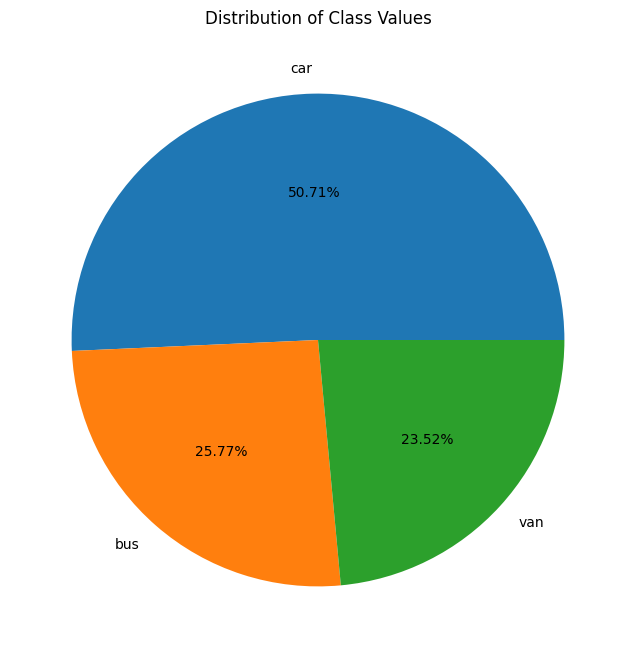

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame named 'df'

# Get the counts for each class value
class_counts = dfv['class'].value_counts().sort_values(ascending=False)

# Calculate percentages
total_entries = len(dfv)
class_percentages = (class_counts / total_entries) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as desired
plt.pie(class_percentages, labels=class_counts.index, autopct="%1.2f%%")  # Format percentage display
plt.title("Distribution of Class Values")

# Print class percentages
print("Class Percentages:")
for class_value, percentage in class_percentages.items():
    print(f"\t- {class_value}: {percentage:.2f}%")

plt.show()

**Check for duplicate rows in the data and impute with correct approach**

In [51]:
duplicates = dfv.duplicated()
# Check if there are any duplicates (using `any` method)
if duplicates.any():
    print("Number of duplicate rows:", duplicates.sum())
    dfv.drop_duplicates()
else:
    print("There are no duplicate rows in the DataFrame")

There are no duplicate rows in the DataFrame


**Data Preparation:**

**Split data into X and Y.**

In [52]:
#replace the cetegorical variables as numerical variables , as PCA works best with numerical variables
#So the class variables are encoded
replace_vals = {'car': 0, 'bus': 1, 'van': 2}
for col in dfv.columns:
    dfv[col].replace(replace_vals, inplace=True)

print(dfv['class'].unique())

[2 0 1]


<ipython-input-52-3394231916>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfv[col].replace(replace_vals, inplace=True)
<ipython-input-52-3394231916>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfv[col].replace(replace_vals, inplace=True)


In [53]:
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

X = dfv.drop(['class'], axis=1)

y = dfv['class']

In [54]:
#split train and test data with 25% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

**Standardize the Data.**

In [55]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

**Model Building:**

**Train a base Classification model using SVM.**

In [56]:
#model for SVM
from sklearn.svm import SVC,SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Building a Support Vector Machine on train data
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

prediction_test = svc_model.predict(X_test_scaled)
prediction_train = svc_model.predict(X_train_scaled)

**Classification metrics for train data.**

In [57]:
print(classification_report(y_train, prediction_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       322
           1       0.99      0.98      0.98       166
           2       0.96      0.95      0.96       146

    accuracy                           0.98       634
   macro avg       0.98      0.97      0.97       634
weighted avg       0.98      0.98      0.98       634



**Classification metrics for test data.**

In [58]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       107
           1       0.96      0.96      0.96        52
           2       0.94      0.96      0.95        53

    accuracy                           0.97       212
   macro avg       0.96      0.97      0.96       212
weighted avg       0.97      0.97      0.97       212



**Apply PCA on the data with 10 components**

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


**Visualize Cumulative Variance Explained with Number of Components.**

In [60]:
#print the eigen Values
print(pca.explained_variance_)

[9.44323769 3.0771798  1.77238049 1.19858594 0.89572413 0.55763926
 0.38873941 0.21927005 0.16192559 0.08736111]


In [61]:
#print the eigen componenets
print(pca.components_)

[[ 0.27477226  0.29226731  0.30463317  0.27184077  0.08001794  0.09244507
   0.31694497 -0.314049    0.31385184  0.2818164   0.30964803  0.31361323
   0.27208398 -0.02660495  0.04242957  0.05762913  0.02913309  0.07406185]
 [ 0.11545451 -0.12347211  0.07440074  0.19939679  0.1538022   0.00816297
  -0.05152464 -0.01010131 -0.06361253 -0.11719555 -0.0626823  -0.05864595
  -0.21319216 -0.48952057  0.02010384  0.12528203  0.53444405  0.5363679 ]
 [-0.13351214 -0.00485566 -0.05966574  0.24108082  0.6433677   0.60016624
  -0.08859022  0.0472216  -0.10124413 -0.01163465  0.04425875 -0.09871142
  -0.00649094  0.27935583 -0.14827873 -0.11658865 -0.0103582   0.02035281]
 [-0.09310632 -0.17963646  0.06392052  0.03927239 -0.03798659 -0.01674804
   0.09468241 -0.08147744  0.09284155 -0.17938513  0.12415432  0.08996974
  -0.18768929  0.08069917 -0.6165357   0.65938154 -0.11278864 -0.04937988]
 [ 0.06263097 -0.08994931  0.05346511 -0.04090978 -0.03154714  0.27988801
  -0.01687098  0.08028106  0.00131

In [62]:
#the percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[0.52379683 0.17068479 0.09831027 0.06648308 0.04968396 0.03093109
 0.02156257 0.01216246 0.00898168 0.00484574]


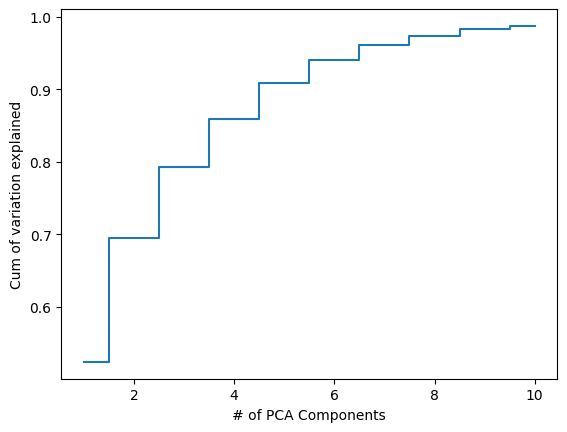

In [63]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.show()

**Draw a horizontal line on the above plot to highlight the threshold of 90%.**

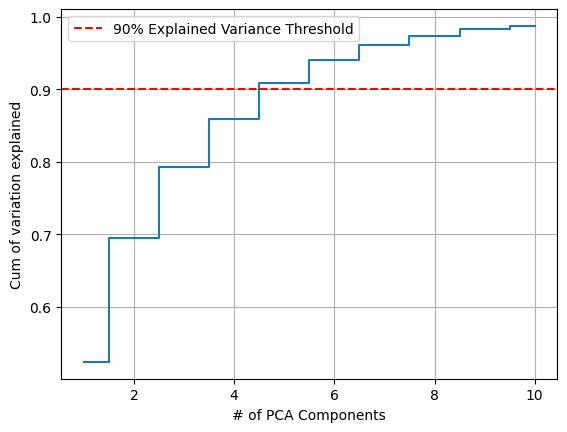

In [64]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')

# Add a horizontal line at 90% explained variance threshold
threshold = 0.9

#plot the horizontal line to highlight the threshold of 90%
plt.axhline(y = threshold, color='red', linestyle='--', label=f'{threshold*100:.0f}% Explained Variance Threshold')

# Add legend for clarity
plt.legend()

plt.grid(True)
plt.show()

**Apply PCA on the data.Select Minimum Components with 90% or above variance explained**


In [65]:
#select n_components where the threshold value is >=90%
pca1 = PCA(n_components=6)
pca1.fit(X_train_scaled)
print("The eigen componenets")
print(pca1.components_)
print("\nThe percentage of variation explained by each eigen Vector\n")
print(pca1.explained_variance_ratio_)

Xpca1_train = pca1.fit_transform(X_train_scaled)
Xpca1_test = pca1.transform(X_test_scaled)

The eigen componenets
[[ 0.27477226  0.29226731  0.30463317  0.27184077  0.08001794  0.09244507
   0.31694497 -0.314049    0.31385184  0.2818164   0.30964803  0.31361323
   0.27208398 -0.02660495  0.04242957  0.05762913  0.02913309  0.07406185]
 [ 0.11545451 -0.12347211  0.07440074  0.19939679  0.1538022   0.00816297
  -0.05152464 -0.01010131 -0.06361253 -0.11719555 -0.0626823  -0.05864595
  -0.21319216 -0.48952057  0.02010384  0.12528203  0.53444405  0.5363679 ]
 [-0.13351214 -0.00485566 -0.05966574  0.24108082  0.6433677   0.60016624
  -0.08859022  0.0472216  -0.10124413 -0.01163465  0.04425875 -0.09871142
  -0.00649094  0.27935583 -0.14827873 -0.11658865 -0.0103582   0.02035281]
 [-0.09310632 -0.17963646  0.06392052  0.03927239 -0.03798659 -0.01674804
   0.09468241 -0.08147744  0.09284155 -0.17938513  0.12415432  0.08996974
  -0.18768929  0.08069917 -0.6165357   0.65938154 -0.11278864 -0.04937988]
 [ 0.06263097 -0.08994931  0.05346511 -0.04090978 -0.03154714  0.27988801
  -0.0168709

**Train SVM model on components selected after pca.**

In [66]:
#model for SVM
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Building a Support Vector Machine on train data
svc_model_pca = SVC()
#svc_model_pca.fit(X_train_scaled, y_train)

svc_model_pca.fit(Xpca1_train,y_train)
svc_model_pca.fit(Xpca1_test,y_test)

prediction_train_pca = svc_model_pca.predict(Xpca1_train)
prediction_test_pca = svc_model_pca.predict(Xpca1_test)

**Classification metrics for train data of above model and share insights.**

In [67]:
print("Classification metrics on Train Data using SVM Model after PCA")
print(classification_report(y_train, prediction_train_pca))

print("Classification metrics on Test Data using SVM Model ")
print(classification_report(y_test, prediction_test_pca))

Classification metrics on Train Data using SVM Model after PCA
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       322
           1       0.90      0.74      0.81       166
           2       0.81      0.80      0.81       146

    accuracy                           0.85       634
   macro avg       0.85      0.82      0.83       634
weighted avg       0.85      0.85      0.85       634

Classification metrics on Test Data using SVM Model 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       107
           1       0.88      0.87      0.87        52
           2       0.93      0.81      0.87        53

    accuracy                           0.89       212
   macro avg       0.90      0.87      0.88       212
weighted avg       0.89      0.89      0.89       212



**Performance Improvement:**

**Train another SVM on the components out of PCA. Tune the parameters to improve performance.**

In [68]:
from sklearn.model_selection import GridSearchCV

# Common SVM hyperparameters to explore (adjust based on your model)
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel function
    'gamma': [0.001, 0.01, 0.1, 1]  # Gamma for RBF kernel
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator = svc_model_pca, param_grid=param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid_search.fit(Xpca1_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

**Share best Parameters observed from above step.**

In [69]:
best_params = grid_search.best_params_
C = best_params['C']
gamma = best_params['gamma']
kernel = best_params['kernel']
print("The Best parameters for SVM Model using GridSearch :",best_params)

The Best parameters for SVM Model using GridSearch : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [70]:
prediction_train_svc_pca = svc_model_pca.predict(Xpca1_train)
prediction_test_svc_pca = svc_model_pca.predict(Xpca1_test)

**Classification metrics for train data of above model and share relative improvement in performance in all the models along with
insights.**

In [71]:
# Building a Support Vector Machine on train data
#svc_model_pca_pt = SVC(C= 10, gamma = 0.1, kernel = 'rbf')
svc_model_pca_pt = SVC(C=C, gamma=gamma, kernel=kernel)
svc_model_pca_pt.fit(X_train_scaled, y_train)

svc_model_pca_pt.fit(Xpca1_train,y_train)
svc_model_pca_pt.fit(Xpca1_test,y_test)

print("Classification metrics on Train Data using SVM Model")
print(classification_report(y_train, prediction_train))

print("Classification metrics on Train Data using SVM Model after PCA")
print(classification_report(y_train, prediction_train_pca))


Classification metrics on Train Data using SVM Model
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       322
           1       0.99      0.98      0.98       166
           2       0.96      0.95      0.96       146

    accuracy                           0.98       634
   macro avg       0.98      0.97      0.97       634
weighted avg       0.98      0.98      0.98       634

Classification metrics on Train Data using SVM Model after PCA
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       322
           1       0.90      0.74      0.81       166
           2       0.81      0.80      0.81       146

    accuracy                           0.85       634
   macro avg       0.85      0.82      0.83       634
weighted avg       0.85      0.85      0.85       634



In [72]:

print("Score on Train Data using SVM Model(after Paramerter Tuning) after PCA")
print(classification_report(y_train, prediction_train_svc_pca))

print("Score on Test Data using SVM Model(after Paramerter Tuning) after PCA")
print(classification_report(y_test, prediction_test_svc_pca))


Score on Train Data using SVM Model(after Paramerter Tuning) after PCA
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       322
           1       0.90      0.74      0.81       166
           2       0.81      0.80      0.81       146

    accuracy                           0.85       634
   macro avg       0.85      0.82      0.83       634
weighted avg       0.85      0.85      0.85       634

Score on Test Data using SVM Model(after Paramerter Tuning) after PCA
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       107
           1       0.88      0.87      0.87        52
           2       0.93      0.81      0.87        53

    accuracy                           0.89       212
   macro avg       0.90      0.87      0.88       212
weighted avg       0.89      0.89      0.89       212



- **SVM without PCA** had the highest training accuracy (98%) but may overfit.

- **SVM with PCA** dropped to 85% accuracy on training data.

- **After hyperparameter tuning**, test accuracy improved to 89%.

- **Best model:** SVM with PCA and tuning — good generalization and balanced performance across classes.

In [73]:
dfv.shape

(846, 19)

**Data Understanding & Cleaning:**



*   The Orginal Dataset has a total of 19 variables with 18 numerical variables and 1 categorical varibales
*   There are more no of variables to analyse ,so **PCA would be a better** solution in this kind of large data set
*   The PCA works best on numerical data, as there is one **categorical variable** 'class', we can encode the variable using **one hot encoding** or labeling to numerical data
*   Scaling is important process during PCA, as the **standardization/scaling** ensures the data with large scales doesnt dominate the nalysis of
*   Machine Learning models can be sometimes very computationaly expensive in large dataset, reducing the dimensionality helps or reduces the computational time of the model, leading to reduced train and prediction time


**Advantages and limitations of PCA.**

**Advantages:**
1.   PCA helps to **identify the redundant or highly correlated features**/variables.This helps to retain only the necessary data/features which helps in **improving the performance by avoiding overfitting** to noisy features and reducing the model complexity
2.   Visualizing a high dimensonal data is difficult, reducing the data to lower dimensions helps to **visualize easily the relationship betweern variables**/data points.EDA is easy and helps understand the structure and relationship in the dataset
3.   Reducing dimensionality using PCA may slightly reduce model performance, but it **significantly improves computational efficiency and training time**, especially with large datasets and complex models

**Limitations:**
1.   During dimensionality reduction the few data features are lost. Choosing the optimal number of components is crucial to balance capturing enough variance and avoiding excessive information loss.
2.   If the relationships are **highly non-linear, PCA might not be the most effective method**. It will focus on capturing the linear variance, potentially missing out on important non-linear relationships in the data.